In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import pyforest

In [117]:
book=pd.read_csv("book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# for whole dataset with support=0.1, lift_therhold=0.8,confi_threshold=0.5 

In [ ]:
# using apriori for determing support of itemsets (with min_support=0.1)

In [101]:
book_itemsets = apriori(book, min_support=0.1, use_colnames=True)
book_itemsets


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [148]:
# rules with min confidence of 0.5

In [145]:
confi_rules = association_rules(book_itemsets, metric="confidence", min_threshold=0.5)
confi_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095
9,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


In [ ]:
# Finding association rules wiht threshold of 0.8

In [147]:
rules = association_rules(book_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


In [ ]:
# Sorting the association rules with heighest lift ratio for top 10

In [84]:
rules.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [ ]:
# Gathering the most effictive rules which have lift ratio greater than 1

In [85]:
r=rules[rules.lift>1]
r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [135]:
l=r.pivot('antecedents','consequents','lift')
l.head()

consequents,(ChildBks),(YouthBks),(CookBks),"(DoItYBks, GeogBks)","(GeogBks, CookBks)","(GeogBks, ChildBks)","(CookBks, ArtBks)","(ArtBks, ChildBks)","(CookBks, RefBks)","(RefBks, ChildBks)",...,"(GeogBks, ArtBks)","(CookBks, ChildBks)","(ChildBks, YouthBks)",(ItalCook),(GeogBks),(ArtBks),(RefBks),(DoItYBks),"(DoItYBks, ChildBks)","(DoItYBks, ArtBks)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(YouthBks),1.576044,NaN,1.518667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.035985,NaN,NaN,1.764017,1.693281,NaN,1.654846,NaN,NaN
(ChildBks),NaN,1.576044,1.404179,1.86449,1.835989,NaN,1.790745,NaN,1.899004,NaN,...,1.891253,NaN,NaN,NaN,1.670264,1.594028,1.669725,1.542511,NaN,NaN
"(DoItYBks, GeogBks)",1.864490,NaN,1.899926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(GeogBks, ChildBks)",NaN,NaN,1.778809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.170444,NaN,1.900346,NaN,NaN
"(GeogBks, CookBks)",1.835989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.230964,NaN,1.998711,NaN,NaN


In [ ]:
 # Vizualising rules with Heatmap for lift ratio

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'YouthBks'})"),
  Text(2.5, 0, "frozenset({'CookBks'})"),
  Text(3.5, 0, "frozenset({'DoItYBks', 'GeogBks'})"),
  Text(4.5, 0, "frozenset({'GeogBks', 'CookBks'})"),
  Text(5.5, 0, "frozenset({'GeogBks', 'ChildBks'})"),
  Text(6.5, 0, "frozenset({'CookBks', 'ArtBks'})"),
  Text(7.5, 0, "frozenset({'ArtBks', 'ChildBks'})"),
  Text(8.5, 0, "frozenset({'CookBks', 'RefBks'})"),
  Text(9.5, 0, "frozenset({'RefBks', 'ChildBks'})"),
  Text(10.5, 0, "frozenset({'DoItYBks', 'CookBks'})"),
  Text(11.5, 0, "frozenset({'CookBks', 'YouthBks'})"),
  Text(12.5, 0, "frozenset({'GeogBks', 'ArtBks'})"),
  Text(13.5, 0, "frozenset({'CookBks', 'ChildBks'})"),
  Text(14.5, 0, "frozenset({'ChildBks', 'YouthBks'})"),
  Text(15.5, 0, "frozenset({'ItalCook'})"),
  Text(16.5, 0, "frozenset({'Geog

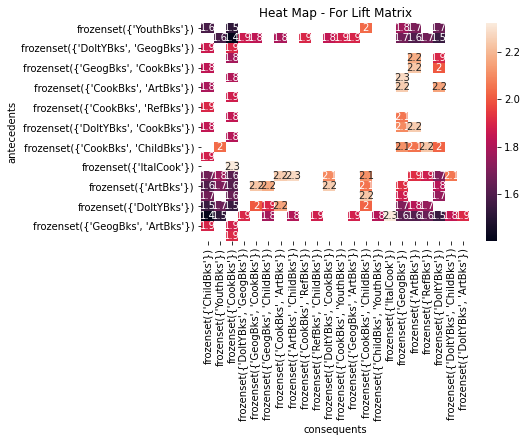

In [136]:
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [ ]:
# Scatter plot for the associatioin rules with their confidence vs support 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'support vs confidence')

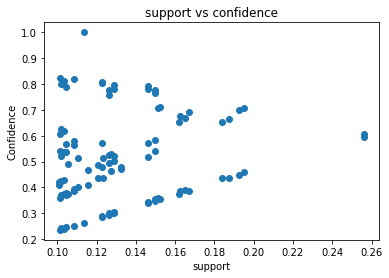

In [123]:
sup=r['support']
con=r['confidence']
plt.scatter(sup,con)
plt.xlabel('support')
plt.ylabel('Confidence')
plt.title('support vs confidence')

In [ ]:
############################################################################

# Association rules with support=0.16 and threshold=0.9 for whole dataset

In [107]:
book_itemsets2 = apriori(book, min_support=0.16, use_colnames=True)
book_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [108]:
rules2 = association_rules(book_itemsets2, metric="lift", min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


In [112]:
r2=rules2[rules2.lift>1]
r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


# For book dataset with 1000 datapoints with support=0.15 and thershold=0.95

In [121]:
book2=book[:100]
book2

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,0,0,0,0,0,0,0,0
96,1,1,0,0,0,0,0,0,0,0,0
97,1,0,1,0,0,0,1,1,0,0,0
98,1,1,1,1,0,0,1,0,0,0,0


In [119]:
book_itemsets3 = apriori(book2, min_support=0.15, use_colnames=True)
book_itemsets3

,support,itemsets
0,0.48,(ChildBks)
1,0.25,(YouthBks)
2,0.47,(CookBks)
3,0.29,(DoItYBks)
4,0.16,(RefBks)
5,0.23,(ArtBks)
6,0.34,(GeogBks)
7,0.18,"(YouthBks, ChildBks)"
8,0.29,"(CookBks, ChildBks)"
9,0.18,"(DoItYBks, ChildBks)"


In [120]:
rules3 = association_rules(book_itemsets3, metric="lift", min_threshold=0.95)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.25,0.48,0.18,0.720000,1.500000,0.0600,1.857143
1,(ChildBks),(YouthBks),0.48,0.25,0.18,0.375000,1.500000,0.0600,1.200000
2,(CookBks),(ChildBks),0.47,0.48,0.29,0.617021,1.285461,0.0644,1.357778
3,(ChildBks),(CookBks),0.48,0.47,0.29,0.604167,1.285461,0.0644,1.338947
4,(DoItYBks),(ChildBks),0.29,0.48,0.18,0.620690,1.293103,0.0408,1.370909
5,(ChildBks),(DoItYBks),0.48,0.29,0.18,0.375000,1.293103,0.0408,1.136000
6,(ArtBks),(ChildBks),0.23,0.48,0.19,0.826087,1.721014,0.0796,2.990000
7,(ChildBks),(ArtBks),0.48,0.23,0.19,0.395833,1.721014,0.0796,1.274483
8,(GeogBks),(ChildBks),0.34,0.48,0.25,0.735294,1.531863,0.0868,1.964444
9,(ChildBks),(GeogBks),0.48,0.34,0.25,0.520833,1.531863,0.0868,1.377391


In [122]:
r3=rules3[rules3.lift>1]
r3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.25,0.48,0.18,0.720000,1.500000,0.0600,1.857143
1,(ChildBks),(YouthBks),0.48,0.25,0.18,0.375000,1.500000,0.0600,1.200000
2,(CookBks),(ChildBks),0.47,0.48,0.29,0.617021,1.285461,0.0644,1.357778
3,(ChildBks),(CookBks),0.48,0.47,0.29,0.604167,1.285461,0.0644,1.338947
4,(DoItYBks),(ChildBks),0.29,0.48,0.18,0.620690,1.293103,0.0408,1.370909
5,(ChildBks),(DoItYBks),0.48,0.29,0.18,0.375000,1.293103,0.0408,1.136000
6,(ArtBks),(ChildBks),0.23,0.48,0.19,0.826087,1.721014,0.0796,2.990000
7,(ChildBks),(ArtBks),0.48,0.23,0.19,0.395833,1.721014,0.0796,1.274483
8,(GeogBks),(ChildBks),0.34,0.48,0.25,0.735294,1.531863,0.0868,1.964444
9,(ChildBks),(GeogBks),0.48,0.34,0.25,0.520833,1.531863,0.0868,1.377391


consequents,(ChildBks),(YouthBks),(CookBks),(DoItYBks),(ArtBks),(GeogBks),"(CookBks, ChildBks)","(DoItYBks, ChildBks)","(DoItYBks, CookBks)","(GeogBks, ChildBks)","(GeogBks, CookBks)"
antecedents,,,,,,,,,,,
(YouthBks),1.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(ChildBks),NaN,1.5,1.285461,1.293103,1.721014,1.531863,NaN,NaN,1.5625,NaN,1.5625
(CookBks),1.285461,NaN,NaN,1.467351,1.480111,1.752190,NaN,1.77305,NaN,1.787234,NaN
(DoItYBks),1.293103,NaN,1.467351,NaN,NaN,1.521298,1.783591,NaN,NaN,NaN,NaN
(ArtBks),1.721014,NaN,1.480111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'YouthBks'})"),
  Text(2.5, 0, "frozenset({'CookBks'})"),
  Text(3.5, 0, "frozenset({'DoItYBks'})"),
  Text(4.5, 0, "frozenset({'ArtBks'})"),
  Text(5.5, 0, "frozenset({'GeogBks'})"),
  Text(6.5, 0, "frozenset({'CookBks', 'ChildBks'})"),
  Text(7.5, 0, "frozenset({'DoItYBks', 'ChildBks'})"),
  Text(8.5, 0, "frozenset({'DoItYBks', 'CookBks'})"),
  Text(9.5, 0, "frozenset({'GeogBks', 'ChildBks'})"),
  Text(10.5, 0, "frozenset({'GeogBks', 'CookBks'})")])

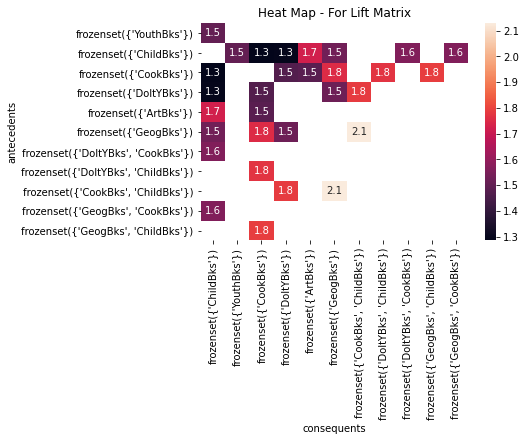

In [133]:
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)